In [132]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# Use "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in anaconda promt

In [134]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [136]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [138]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f75a7032-9ceb-43ba-8a9b-9ac965e7d197',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
# Use "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" in anaconda promt

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df._append(df2)


# to save and append the data to csv file use this code below:
    
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\LABLAB\Downloads\APIs\API.csv'):
    #    df.to_csv(r'C:\Users\LABLAB\Downloads\APIs\API.csv', headers = 'column_names')
    #else:
    #    df.to_csv(r'C:\Users\LABLAB\Downloads\APIs\API.csv', mode = 'a', headers = False)

In [169]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('Api Runner Completed')
    sleep(60)
exit()

#wait for a few mins to get the values for visualization

Api Runner Completed
Api Runner Completed
Api Runner Completed
Api Runner Completed


KeyboardInterrupt: 

In [171]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11617,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19731796.00000,19731796.00000,False,NaN,1,NaN,NaN,None,2024-07-27T12:40:00.000Z,68358.61959,24193489210.54092,-29.49930,0.25837,1.75308,2.69933,11.76361,-0.12110,7.53467,1348838336609.28003,55.37390,1435531011408.93994,None,2024-07-27T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-27 22:16:36.083323
1,1027,Ethereum,ETH,ethereum,9175,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228315.01960,120228315.01960,True,NaN,2,NaN,NaN,None,2024-07-27T12:39:00.000Z,3288.89430,12424742900.98798,-39.85810,0.35306,1.38069,-5.93378,-3.73099,-15.77766,-0.09410,395418219623.07605,16.23310,395418219623.08002,None,2024-07-27T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-27 22:16:36.083323
2,825,Tether USDt,USDT,tether,92802,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,114329209286.92436,117068083204.58287,True,NaN,3,NaN,NaN,None,2024-07-27T12:39:00.000Z,1.00033,42700836062.37247,-29.90940,0.01633,0.04502,-0.01932,0.13779,0.10473,0.07116,114367390946.57724,4.69510,117107179545.20000,None,2024-07-27T12:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-27 22:16:36.083323
3,5426,Solana,SOL,solana,708,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464726586.67910,581050858.99376,True,NaN,4,NaN,NaN,None,2024-07-27T12:39:00.000Z,186.38238,2490748894.33486,-25.06650,0.62905,4.33167,10.39022,34.09852,9.01360,31.76047,86616848081.49142,3.55590,108297643009.25000,None,2024-07-27T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-27 22:16:36.083323
4,1839,BNB,BNB,bnb,2200,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145937670.94002,145937670.94002,False,NaN,5,NaN,NaN,None,2024-07-27T12:39:00.000Z,587.85002,1598155629.81198,-11.35330,0.11339,1.83426,-0.69945,2.72282,-2.41568,-2.20740,85789463256.76540,3.52190,85789463256.77000,None,2024-07-27T12:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-27 22:16:36.083323
5,3408,USDC,USDC,usd-coin,21174,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34149150675.73482,34149150675.73482,False,NaN,6,NaN,NaN,None,2024-07-27T12:39:00.000Z,1.00019,4714220086.30788,-26.18140,0.01602,0.01852,0.01898,0.03542,-0.02179,0.01355,34155697137.81779,1.40220,34155697137.82000,None,2024-07-27T12:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-27 22:16:36.083323
6,52,XRP,XRP,xrp,1356,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55960868753.00000,99987409084.00000,False,NaN,7,NaN,NaN,None,2024-07-27T12:40:00.000Z,0.60165,1048682897.81306,-41.98280,0.30375,0.41966,1.38818,27.31637,13.42485,16.03175,33668808282.31002,1.38220,60164913505.75000,None,2024-07-27T12:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-27 22:16:36.083323
7,74,Dogecoin,DOGE,dogecoin,1028,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145287356383.70526,145287356383.70526,True,NaN,8,NaN,NaN,None,2024-07-27T12:40:00.000Z,0.13537,677970475.78390,-17.28610,0.24819,4.52137,6.97531,10.73825,-18.33254,-9.21448,19667138409.39414,0.80740,19667138409.39000,None,2024-07-27T12:40:00.000Z,NaN,NaN,NaN

In [173]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only = True)
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.37631,2.13123,3.52513,11.13489,1.21271,8.45026
Ethereum,-0.03671,1.60872,-5.40769,-4.42803,-14.81060,0.01148
Tether USDt,-0.01795,0.01629,-0.03294,0.10109,0.11304,0.05048
Solana,0.05328,2.84457,10.58539,26.29701,8.89010,31.35316
BNB,-0.02554,1.99802,-0.35709,1.77121,-1.75066,-2.12648
USDC,-0.01532,-0.00750,-0.00020,0.00520,-0.00818,-0.00755
XRP,-0.06850,1.68786,2.00578,26.92872,13.92684,16.31748
Dogecoin,0.58137,4.91240,7.05511,9.61400,-16.64674,-8.49543
Toncoin,-0.05543,-1.16973,-8.21185,-12.63100,5.00929,22.89866


In [175]:
# We cannot use pivot to this data so I will use the stack function

df4 = df3.stack()
#df4

In [177]:
type(df4)

pandas.core.series.Series

In [179]:
# We need to convert df4(in Series) into a dataframe

df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.37631
            quote.USD.percent_change_24h   2.13123
            quote.USD.percent_change_7d    3.52513
            quote.USD.percent_change_30d  11.13489
            quote.USD.percent_change_60d   1.21271
            quote.USD.percent_change_90d   8.45026
Ethereum    quote.USD.percent_change_1h   -0.03671
            quote.USD.percent_change_24h   1.60872
            quote.USD.percent_change_7d   -5.40769
            quote.USD.percent_change_30d  -4.42803
            quote.USD.percent_change_60d -14.81060
            quote.USD.percent_change_90d   0.01148
Tether USDt quote.USD.percent_change_1h   -0.01795
            quote.USD.percent_change_24h   0.01629
            quote.USD.percent_change_7d   -0.03294
            quote.USD.percent_change_30d   0.10109
            quote.USD.percent_change_60d   0.11304
            quote.USD.percent_change_90d   0.05048
Solana      quote.USD.percent_change_1h    0.05328
            quote.USD.percent_change_24h   2.84457
            quote.USD.percent_change_7d   10.58539
            quote.USD.percent_change_30d  26.29701
            quote.USD.percent_change_60d   8.89010
            quote.USD.percent_change_90d  31.35316
BNB         quote.USD.percent_change_1h   -0.02554
            quote.USD.percent_change_24h   1.99802
            quote.USD.percent_change_7d   -0.35709
            quote.USD.percent_change_30d   1.77121
            quote.USD.percent_change_60d  -1.75066
            quote.USD.percent_change_90d  -2.12648
USDC        quote.USD.percent_change_1h   -0.01532
            quote.USD.percent_change_24h  -0.00750
            quote.USD.percent_change_7d   -0.00020
            quote.USD.percent_change_30d   0.00520
            quote.USD.percent_change_60d  -0.00818
            quote.USD.percent_change_90d  -0.00755
XRP         quote.USD.percent_change_1h   -0.06850
            quote.USD.percent_change_24h   1.68786
            quote.USD.percent_change_7d    2.00578
            quote.USD.percent_change_30d  26.92872
            quote.USD.percent_change_60d  13.92684
            quote.USD.percent_change_90d  16.31748
Dogecoin    quote.USD.percent_change_1h    0.58137
            quote.USD.percent_change_24h   4.91240
            quote.USD.percent_change_7d    7.05511
            quote.USD.percent_change_30d   9.61400
            quote.USD.percent_change_60d -16.64674
            quote.USD.percent_change_90d  -8.49543
Toncoin     quote.USD.percent_change_1h   -0.05543
            quote.USD.percent_change_24h  -1.16973
            quote.USD.percent_change_7d   -8.21185
            quote.USD.percent_change_30d -12.63100
            quote.USD.percent_change_60d   5.00929
            quote.USD.percent_change_90d  22.89866
Cardano     quote.USD.percent_change_1h    0.41420
            quote.USD.percent_change_24h   2.51324
            quote.USD.percent_change_7d   -1.74045
            quote.USD.percent_change_30d   8.58953
            quote.USD.percent_change_60d  -7.38025
            quote.USD.percent_change_90d  -9.78533
TRON        quote.USD.percent_change_1h   -0.13764
            quote.USD.percent_change_24h   0.17262
            quote.USD.percent_change_7d    2.21496
            quote.USD.percent_change_30d  11.71505
            quote.USD.percent_change_60d  23.25207
            quote.USD.percent_change_90d  13.75245
Avalanche   quote.USD.percent_change_1h    1.00651
            quote.USD.percent_change_24h   4.62648
            quote.USD.percent_change_7d    4.34607
            quote.USD.percent_change_30d   6.82088
            quote.USD.percent_change_60d -20.89292
            quote.USD.percent_change_90d -15.21801
Shiba Inu   quote.USD.percent_change_1h    0.22130
            quote.USD.percent_change_24h   3.48321
            quote.USD.percent_change_7d   -2.31223
            quote.USD.percent_change_30d  -1.17222
            quote.USD.percent_change_60d -32.65715
            quo

In [181]:
df5.count()

values    90
dtype: int64

In [183]:
# Create an index from scratch
# The final output will show a pivoted table of the original data
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.37631
1,Bitcoin,quote.USD.percent_change_24h,2.13123
2,Bitcoin,quote.USD.percent_change_7d,3.52513
3,Bitcoin,quote.USD.percent_change_30d,11.13489
4,Bitcoin,quote.USD.percent_change_60d,1.21271
5,Bitcoin,quote.USD.percent_change_90d,8.45026
6,Ethereum,quote.USD.percent_change_1h,-0.03671
7,Ethereum,quote.USD.percent_change_24h,1.60872
8,Ethereum,quote.USD.percent_change_7d,-5.40769
9,Ethereum,quote.USD.percent_change_30d,-4.42803


In [185]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.37631
1,Bitcoin,quote.USD.percent_change_24h,2.13123
2,Bitcoin,quote.USD.percent_change_7d,3.52513
3,Bitcoin,quote.USD.percent_change_30d,11.13489
4,Bitcoin,quote.USD.percent_change_60d,1.21271
5,Bitcoin,quote.USD.percent_change_90d,8.45026
6,Ethereum,quote.USD.percent_change_1h,-0.03671
7,Ethereum,quote.USD.percent_change_24h,1.60872
8,Ethereum,quote.USD.percent_change_7d,-5.40769
9,Ethereum,quote.USD.percent_change_30d,-4.42803


In [187]:
#chage the timeframe names
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1hr','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.37631
1,Bitcoin,24h,2.13123
2,Bitcoin,7d,3.52513
3,Bitcoin,30d,11.13489
4,Bitcoin,60d,1.21271
5,Bitcoin,90d,8.45026
6,Ethereum,1hr,-0.03671
7,Ethereum,24h,1.60872
8,Ethereum,7d,-5.40769
9,Ethereum,30d,-4.42803


In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

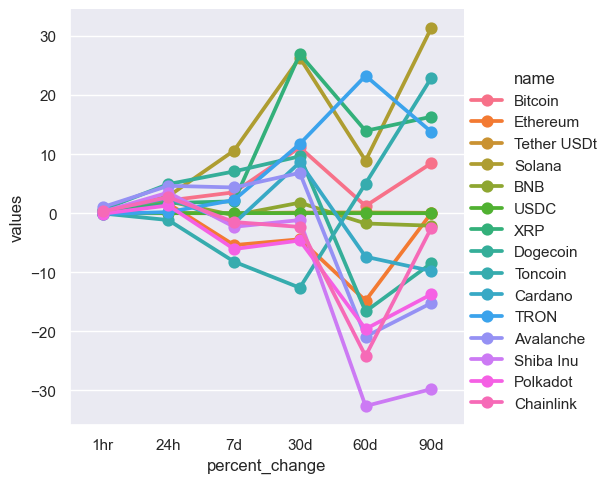

In [191]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [193]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Solana'")
df8

,name,quote.USD.price,timestamp
3,Solana,186.38238,2024-07-27 22:16:36.083323
3,Solana,186.57506,2024-07-27 22:17:15.826362
3,Solana,186.41008,2024-07-27 22:22:24.038127
3,Solana,186.41337,2024-07-27 22:23:26.294116
3,Solana,186.43068,2024-07-27 22:24:26.697281
3,Solana,186.35929,2024-07-27 22:25:27.125167


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

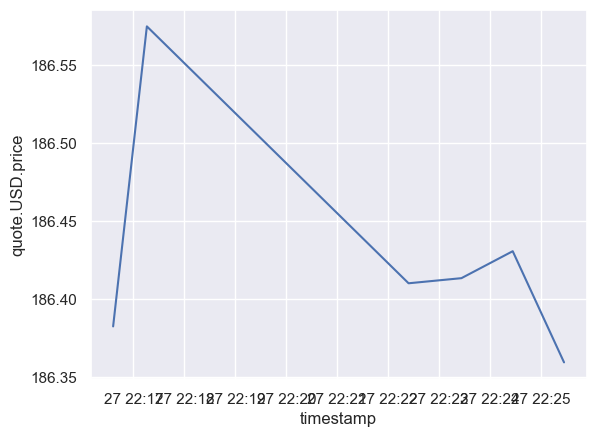

In [195]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)